<a href="https://colab.research.google.com/github/MethodFunc/DL-COLAB/blob/master/Cifar_10_keras_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical

In [ ]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape, x_test.shape

In [ ]:
np.max(y_train), np.min(y_train)

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(2))
model.add(Activation('relu'))

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(2))
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Conv2D(128, 3, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
MODEL_DIR = 'model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [ ]:
MODELPATH = MODEL_DIR + 'Cifar10-{epoch:03d}-{val_loss:.4f}.hdf5'
checkpoint_cb = ModelCheckpoint(MODELPATH, verbose=1, save_best_only=True)
early_stopping_cb = EarlyStopping(patience=20)

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(0.001),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=50, callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
del model

In [16]:
model = load_model('model/Cifar10-017-0.6409.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [17]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [18]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 2s 167us/step


0.7922999858856201

In [19]:
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']
y_acc = history.history['accuracy']

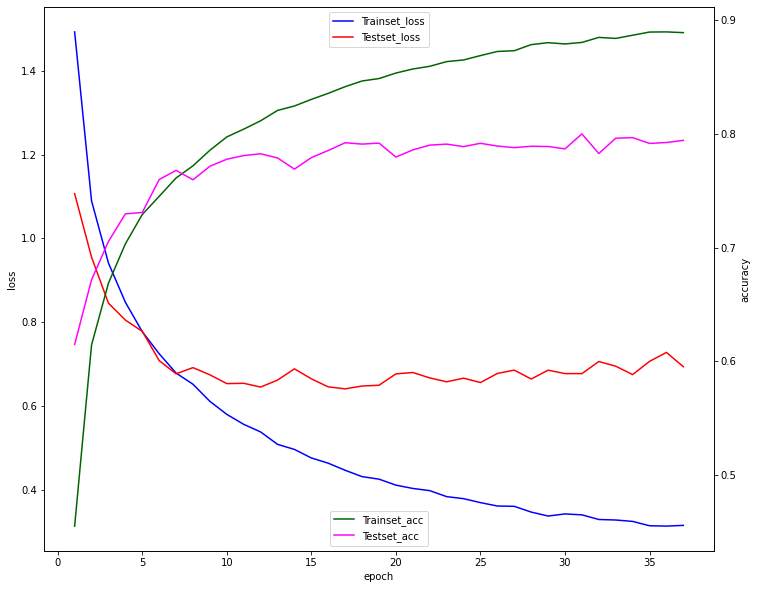

In [20]:
x_len = np.arange(1, len(y_loss) + 1)
fit, ax0 = plt.subplots(figsize=(12, 10))
ax1 = plt.twinx()

ax0.plot(x_len, y_loss, c='blue', label='Trainset_loss')
ax0.plot(x_len, y_vloss, c='red', label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c='darkgreen', label='Trainset_acc')
ax1.plot(x_len, y_vacc, c='magenta', label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()